<a href="https://colab.research.google.com/github/UtkarshSharma-004/Employee_salary_prediction/blob/main/Employee_salary_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pandas scikit-learn gradio matplotlib seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import gradio as gr

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load Data
df = pd.read_csv(next(iter(uploaded)))
df.dropna(inplace=True)


Saving Salary_Data.csv to Salary_Data (1).csv


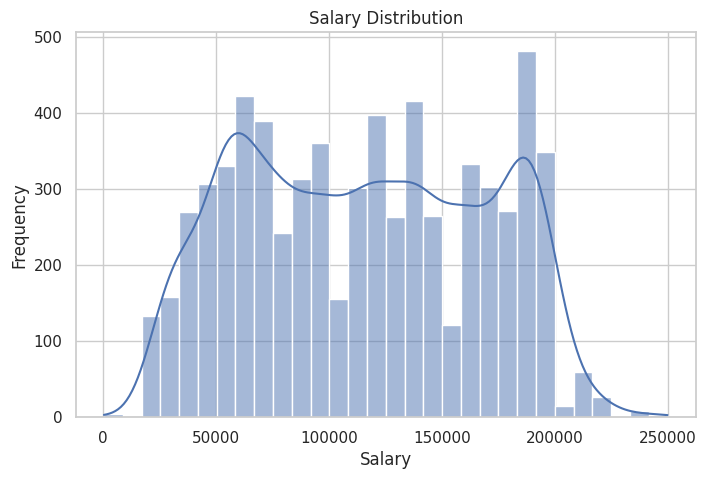

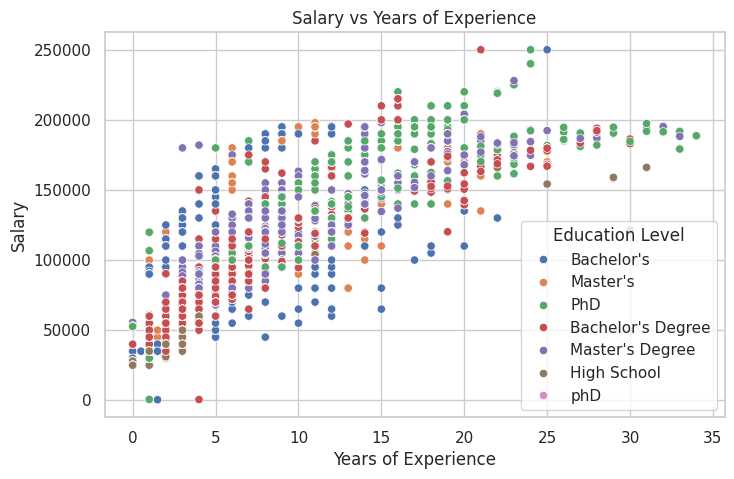

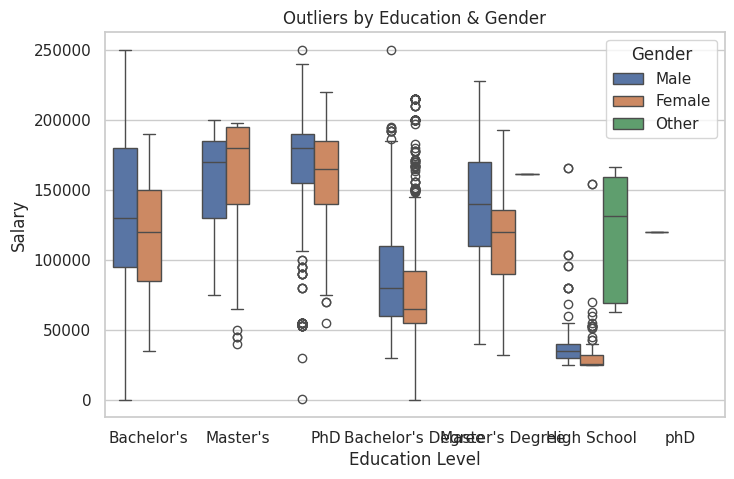

In [ ]:
sns.set(style="whitegrid")

# Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Salary vs Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Years of Experience", y="Salary", hue="Education Level")
plt.title("Salary vs Years of Experience")
plt.show()

# Boxplot: Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Education Level", y="Salary", hue="Gender")
plt.title("Outliers by Education & Gender")
plt.show()

In [ ]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["Salary"] < (Q1 - 1.5 * IQR)) | (df["Salary"] > (Q3 + 1.5 * IQR)))]

In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

categorical_cols = ["Gender", "Education Level", "Job Title"]
numerical_cols = ["Age", "Years of Experience"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="passthrough"
)

In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 2706.782803778925
Mean Squared Error: 47141959.59364618
R² Score: 0.9834674265053875


In [ ]:
def predict_salary(age, gender, education, job_title, experience):
    input_df = pd.DataFrame([{
        "Age": age,
        "Gender": gender,
        "Education Level": education,
        "Job Title": job_title,
        "Years of Experience": experience
    }])
    prediction = model.predict(input_df)[0]
    return f"Predicted Salary: ₹{int(prediction):,}"

genders = df["Gender"].unique().tolist()
education_levels = df["Education Level"].unique().tolist()
job_titles = df["Job Title"].unique().tolist()

gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Slider(18, 65, step=1, label="Age"),
        gr.Dropdown(genders, label="Gender"),
        gr.Dropdown(education_levels, label="Education Level"),
        gr.Dropdown(job_titles, label="Job Title"),
        gr.Slider(0, 40, step=1, label="Years of Experience")
    ],
    outputs=gr.Textbox(label="Predicted Salary"),
    title="Employee Salary Predictor",
    description="Enter employee details to estimate their salary using a machine learning model."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://716b28a4968de892eb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
